<a href="https://colab.research.google.com/github/merriekay/CS66_F24/blob/main/Day16ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Linked List Operations
## Day16

### CS66: Introduction to Computer Science II | Fall 2024

Thursday, October 23rd, 2024

### Helpful Resources:
[📜 Syllabus](https://docs.google.com/document/d/1lnkmnAm0tfw2ybqhS01ylSqKfkOcAAkmrrZUuDjwHuU/edit?usp=drive_link) | [📬 CodePost Login](https://codepost.io/login) | [📆 Schedule](https://docs.google.com/spreadsheets/d/1FW9s8S04zqpOaA13JyrlNPszk5D-H9dBi7xX6o5VpgY/edit?usp=drive_link) | [🙋‍♂️ PollEverywhere](https://pollev.com/moore) | [🪴 Office Hour Sign-Up](https://calendly.com/meredith-moore/office-hours)

# Announcements:

### You should be working on:
- [Assignment #9](https://analytics.drake.edu/~moore/CS66-F24/Assignment9.html) is released today, due Monday October 28th, 2024, by 11:59 pm to codePost.


# ⏪ Quick Review:

## Linked List vs. Array Philosophy

A __list__ can be implemented using either an _array-based_ or _link-based_ data structure.

The Python `list` type is implmented as an array. An array keeps track of the data in _consecutive memory locations_

(here is a blank memory diagram that we may draw on in the lecture)


<div>
    <img src="emptyarray.png" width="auto"/>
</div>

A __linked list__ allows each item to be anywhere in the computer's memory. It allocates enough space for only one item at a time, and each one keeps track of where the next one is in memory.


<div>
    <img src="emptyarray.png" width="auto"/>
</div>


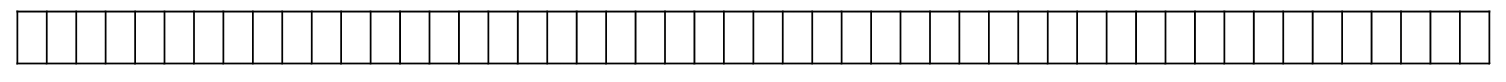

## A picture of a linked list

Linked lists are often drawn like this. Let's talk about what these symbols mean.


<div>
<img src="linkedlist.png" />
</div>
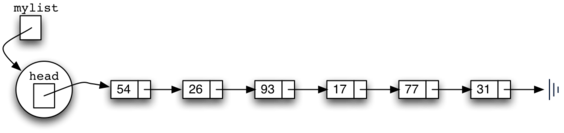

## A class for representing a node in a linked list


A linked list node has two attributes, the data it holds and a reference to the next node in the list.

Here is the `Node` class presented in the textbook.

In [1]:
class Node:
    def __init__(self,initdata):
        self.data = initdata
        self.next = None

    def getData(self):
        return self.data

    def getNext(self):
        return self.next

    def setData(self,newdata):
        self.data = newdata

    def setNext(self,newnext):
        self.next = newnext

## Warm-Up Exercise: 
Write short, concise docstrings for the `Node` class and associated methods.

## Review: An Unordered List Data Structure based on a Linked List

We previously looked at the UnorderedList ADT:

> * `List()` creates a new list that is empty. It needs no parameters and returns an empty list.
> * `add(item)` adds a new item to the list. It needs the item and returns nothing. Assume the item is not already in the list.
> * `remove(item)` removes the item from the list. It needs the item and modifies the list. Assume the item is present in the list.
> * `search(item)` searches for the item in the list. It needs the item and returns a boolean value.
> * `isEmpty()` tests to see whether the list is empty. It needs no parameters and returns a boolean value.
> * `size()` returns the number of items in the list. It needs no parameters and returns an integer.
> * `append(item)` adds a new item to the end of the list making it the last item in the collection. It needs the item and returns nothing. Assume the item is not already in the list.
> * `index(item)` returns the position of item in the list. It needs the item and returns the index. Assume the item is in the list.
> * `insert(pos,item)` adds a new item to the list at position pos. It needs the item and returns nothing. Assume the item is not already in the list and there are enough existing items to have position pos.
> * `pop()` removes and returns the last item in the list. It needs nothing and returns an item. Assume the list has at least one item.
> * `pop(pos)` removes and returns the item at position pos. It needs the position and returns the item. Assume the item is in the list.

We also talked about how the built-in Python `list` type is a pretty good match for this.

Last class, we started implementing the `UnorderedList` class, today we will continue.

## A start to UnorderedList

The code we've written so far for the linked-list-based `UnorderedList` looks like this:

In [2]:
class UnorderedList:

    def __init__(self):
        self.head = None
        
    def isEmpty(self):
        return self.head == None
    
    #this method is really a prepend - it puts the new node at the beginning
    def add(self,item):
        temp = Node(item)
        temp.setNext(self.head)
        self.head = temp

        
#testing it out
my_list = UnorderedList() # create a new UL
print(my_list.isEmpty()) # should return True

my_list.add(31) # add a new node with data 31
my_list.add(77) # add a new node with data 77
my_list.add(17) # add a new node with data 17
my_list.add(93) # add a new node with data 93
my_list.add(26) # add a new node with data 26

print(my_list.isEmpty()) # should return False

True
False


## Traversing a linked list

Some of the operations you need to perform with a linked list require you to traverse (i.e., loop over) all/many items in the list.

For example, if I wanted to display each item in a list, I could do it with a loop as in the `display()` method below:

_we're going to add on to the book example_

In [3]:
class UnorderedList:

    def __init__(self):
        self.head = None
        
    def isEmpty(self):
        return self.head == None
    
    #this method is really a prepend - it puts the new node at the beginning
    def add(self,item):
        temp = Node(item)
        temp.setNext(self.head)
        self.head = temp
        
    def display(self):
        current = self.head #start with the Node at the head
        while current: #this will keep going until current equals None
            print(current.getData()) #display the current Node's data
            current = current.getNext() #move on to the next Node in the list



<div>
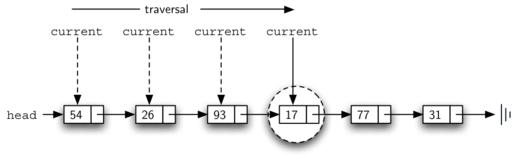
</div>

In [4]:
my_list = UnorderedList()

my_list.add(31)
my_list.add(77)
my_list.add(17)
my_list.add(93)
my_list.add(26)
my_list.add(54)
my_list.display()

54
26
93
17
77
31


## Let's do it with `__repr__` instead

In [5]:
class UnorderedList:

    def __init__(self):
        self.head = None
        
    def isEmpty(self):
        return self.head == None
    
    #this method is really a prepend - it puts the new node at the beginning
    def add(self,item):
        temp = Node(item)
        temp.setNext(self.head)
        self.head = temp
            
    def __repr__(self):
        list_representation = ""
        current = self.head #start with the Node at the head
        while current: #this will keep going until current equals None
            list_representation += str(current.getData())+" -> "
            current = current.getNext() #move on to the next Node in the list
        list_representation += "None" #the last one in the list points to None
        return list_representation
            
my_list = UnorderedList()

my_list.add(31)
my_list.add(77)
my_list.add(17)
my_list.add(93)
my_list.add(26)
my_list.add(54)
print(my_list)

54 -> 26 -> 93 -> 17 -> 77 -> 31 -> None


# ✨New Material

## Traversing to get an item by its index

If you want to get an item by its index, you need to traverse the list and count until you find it.

_Note:_ This is not one of the methods that is listed in the ADT, but I think it is ok to allow it since it's something that you can do with a built-in Python list.


In [3]:
class UnorderedList:

    def __init__(self):
        self.head = None
        
    def isEmpty(self):
        return self.head == None
    
    #this method is really a prepend - it puts the new node at the beginning
    def add(self,item):
        temp = Node(item)
        temp.setNext(self.head)
        self.head = temp
            
    def __repr__(self):
        list_representation = ""
        current = self.head #start with the Node at the head
        while current: #this will keep going until current equals None
            list_representation += str(current.getData())+" -> "
            current = current.getNext() #move on to the next Node in the list
        list_representation += "None" #the last one in the list points to None
        return list_representation
    
    def get(self,index):
        if index < 0:
            raise Exception("list index "+str(index)+" is out of range")
        
        current = self.head
        item_counter = 0
        while current and item_counter < index:
            current = current.getNext()
            item_counter += 1
        if current == None:
            raise Exception("list index "+str(index)+" is out of range")
        return current.getData()


<div>
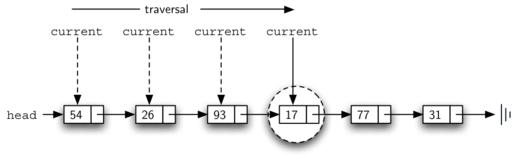
</div>

In [4]:
my_list = UnorderedList()

my_list.add(31)
my_list.add(77)
my_list.add(17)
my_list.add(93)

print(my_list)
print(my_list.get(3))
print(my_list.get(2))
print(my_list.get(5))

93 -> 17 -> 77 -> 31 -> None
31
77


Exception: list index 5 is out of range

## The `__getitem__` magic method

And we can instead implement `__getitem__` in place of our `get` method, which will allow us to use `[ ]` notation instead

In [7]:
class UnorderedList:

    def __init__(self):
        self.head = None
        
    def isEmpty(self):
        return self.head == None
    
    #this method is really a prepend - it puts the new node at the beginning
    def add(self,item):
        temp = Node(item)
        temp.setNext(self.head)
        self.head = temp
            
    def __repr__(self):
        list_representation = ""
        current = self.head #start with the Node at the head
        while current: #this will keep going until current equals None
            list_representation += str(current.getData())+" -> "
            current = current.getNext() #move on to the next Node in the list
        list_representation += "None" #the last one in the list points to None
        return list_representation
    
    def __getitem__(self,index):
        if index < 0:
            raise Exception("list index "+str(index)+" is out of range")
        
        current = self.head
        item_counter = 0
        while current and item_counter < index:
            current = current.getNext()
            item_counter += 1
        if current == None:
            raise Exception("list index "+str(index)+" is out of range")
        return current.getData()
            
my_list = UnorderedList()

my_list.add(31)
my_list.add(77)
my_list.add(17)
my_list.add(93)
my_list.add(26)
my_list.add(54)
print(my_list)

print(my_list[3])

print(my_list[5])

54 -> 26 -> 93 -> 17 -> 77 -> 31 -> None
17
31


## Group Activity Problem 1

Note that the ADT description includes a `search` operation. Add this to your `UnorderedList` class.

> * `search(item)` searches for the item in the list. It needs the item and returns a boolean value.

> __Hint:__ You will need to do a traversal like with `get`, but you're going to be looking for a value in the list that matches your item.

> __Hint 2:__ You can find a solution to this exercise in the book: https://runestone.academy/ns/books/published/pythonds/BasicDS/ImplementinganUnorderedListLinkedLists.html

It should work with code like this:

In [ ]:
my_list = UnorderedList()

my_list.add(31)
my_list.add(77)
my_list.add(17)
my_list.add(93)
my_list.add(26)
my_list.add(54)
print(my_list)

print( my_list.search(17) ) #should print True
print( my_list.search(34) ) #should print False

## Group Activity Problem 2

Create a method called `__contains__` that otherwise is the same as your `search` method.

This allow you to write code as below. Discuss in your group what the difference is between these two approaches.

In [ ]:
my_list = UnorderedList()

my_list.add(31)
my_list.add(77)
my_list.add(17)
my_list.add(93)
my_list.add(26)
my_list.add(54)
print(my_list)

print( 17 in my_list ) #should print True
print( 34 in my_list ) #should print False

## Group Activity Problem 3

What is the Big O of `get`/`__getitem__` and `search`/`__contains__`?

## Group Activity Problem 4

What things from the ADT do we still have left to implement? Write down a to-do list.

Unordered List ADT:

> * `List()` creates a new list that is empty. It needs no parameters and returns an empty list.
> * `add(item)` adds a new item to the list. It needs the item and returns nothing. Assume the item is not already in the list.
> * `remove(item)` removes the item from the list. It needs the item and modifies the list. Assume the item is present in the list.
> * `search(item)` searches for the item in the list. It needs the item and returns a boolean value.
> * `isEmpty()` tests to see whether the list is empty. It needs no parameters and returns a boolean value.
> * `size()` returns the number of items in the list. It needs no parameters and returns an integer.
> * `append(item)` adds a new item to the end of the list making it the last item in the collection. It needs the item and returns nothing. Assume the item is not already in the list.
> * `index(item)` returns the position of item in the list. It needs the item and returns the index. Assume the item is in the list.
> * `insert(pos,item)` adds a new item to the list at position pos. It needs the item and returns nothing. Assume the item is not already in the list and there are enough existing items to have position pos.
> * `pop()` removes and returns the last item in the list. It needs nothing and returns an item. Assume the list has at least one item.
> * `pop(pos)` removes and returns the item at position pos. It needs the position and returns the item. Assume the item is in the list.

## Group Activity Problem 5

Take a look at the implementation of the `size` method in the book ([https://runestone.academy/ns/books/published/pythonds/BasicDS/ImplementinganUnorderedListLinkedLists.html](https://runestone.academy/ns/books/published/pythonds/BasicDS/ImplementinganUnorderedListLinkedLists.html) ). What is the Big O of that approach?

## Group Activity Problem 6

I claim that it is possible to do `size` in $O(1)$ time. Discuss ideas for how you might pull that off.

## Group Activity Problem 7

Come up with a strategy for how you would implement `append` - just describe the approach, you don't actually have to code it up. What would the Big O of that approach be? Can you think of any ways to improve it?

## Group Activity Problem 8

How do the complexities of the methods we've discussed so far compare with the complexities of Python lists ([https://runestone.academy/ns/books/published/pythonds/AlgorithmAnalysis/Lists.html](https://runestone.academy/ns/books/published/pythonds/AlgorithmAnalysis/Lists.html) )? Which things are the same? Which things are Python lists better at? Which things are linked lists better at?

| **Method**           | **Python Lists (Array-based)** | **Linked Lists**            | **Which is better?** |
|----------------------|-------------------------------|-----------------------------|----------------------|
| `add()`_(prepend)_           |                               |                             |                      |
| `search()`           |                               |                             |                      |
| `is_empty()`         |                               |                             |                      |
| `__getitem__()`      |                               |                             |                      |


# Implementing a `pop` method

Now we're going to do something that requires us to keep track of a __trailing reference__ in our traversal - it keeps  track of the item _before_ the current one.

We'll then be able to use the trailing reference to "jump" over the one we're removing.

In [8]:
class UnorderedList:

    def __init__(self):
        self.head = None
        
    def isEmpty(self):
        return self.head == None
    
    #this method is really a prepend - it puts the new node at the beginning
    def add(self,item):
        temp = Node(item)
        temp.setNext(self.head)
        self.head = temp
            
    def __repr__(self):
        list_representation = ""
        current = self.head #start with the Node at the head
        while current: #this will keep going until current equals None
            list_representation += str(current.getData())+" -> "
            current = current.getNext() #move on to the next Node in the list
        list_representation += "None" #the last one in the list points to None
        return list_representation
    
    def __getitem__(self,index):
        
        if index < 0:
            raise Exception("list index "+str(index)+" is out of range")
        
        current = self.head
        item_counter = 0
        
        while current and item_counter < index:
            
            current = current.getNext()
            item_counter += 1
            
        if current == None:
            raise Exception("list index "+str(index)+" is out of range")
            
        return current.getData()
    
    def pop(self,index):
        
        if index < 0:
            raise Exception("list index "+str(index)+" out of range")
        
        
        current = self.head
        previous = None
        item_counter = 0
        
        while current and item_counter < index:
            previous = current
            current = current.getNext()
            item_counter += 1
            
        if current == None:
            raise Exception("list index "+str(index)+" out of range")
            
        # this is an edge case... popping the first item
        if previous == None:
            self.head = current.getNext()
        else:
            previous.setNext(current.getNext())
            
        return current.getData()


<div>
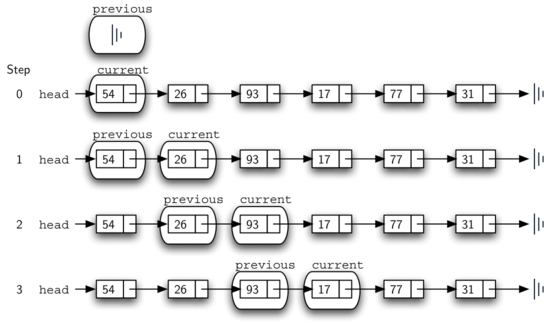
</div>

In [9]:
my_list = UnorderedList()

my_list.add(31)
my_list.add(77)
my_list.add(17)
my_list.add(93)
my_list.add(26)
my_list.add(54)
print(my_list)

print(my_list.pop(3))
print(my_list)

#let's test emptying out the list
while not my_list.isEmpty():
    print(my_list.pop(0))
    print(my_list)


54 -> 26 -> 93 -> 17 -> 77 -> 31 -> None
17
54 -> 26 -> 93 -> 77 -> 31 -> None
54
26 -> 93 -> 77 -> 31 -> None
26
93 -> 77 -> 31 -> None
93
77 -> 31 -> None
77
31 -> None
31
None


## Group Activity Problem 9

Implement a `remove` method for `UnorderedList` which allows you to remove items by their value (rather than their index, which is what `pop()` does.

_Hint:_ You will need a trailing reference, just like with `pop`, but instead of counting to find the Node to remove, you will look at the data.

_Hint 2:_ You can find a solution to this exercise in the book: [https://runestone.academy/ns/books/published/pythonds/BasicDS/ImplementinganUnorderedListLinkedLists.html](https://runestone.academy/ns/books/published/pythonds/BasicDS/ImplementinganUnorderedListLinkedLists.html)

It should work with code like this:

In [ ]:
my_list = UnorderedList()

my_list.add(31)
my_list.add(77)
my_list.add(17)
my_list.add(93)
my_list.add(26)
my_list.add(54)
print(my_list)

my_list.remove(17)
print(my_list)

# Solution to Group Activity #8:

| **Operation**              | **Python Lists (Array-based)** | **Linked Lists**            | **Which is better?**                                                                                       |
|----------------------------|-------------------------------|-----------------------------|-------------------------------------------------------------------------------------------------------------|
| **Indexing** | O(1)                          | O(n)                          | Python lists are better as they provide constant time access to elements.                                    |
| **Appending**          | O(1) (Amortized)               | O(1)                          | Both are equally good, but linked lists always have O(1) time complexity without amortization.                |
| **Prepending**       | O(n)                          | O(1)                          | Linked lists are better as they can prepend in constant time, while Python lists require shifting elements.   |
| **Inserting** | O(n)                          | O(n)                          | Both have the same complexity because Python lists need to shift elements, and linked lists need traversal.   |
| **Deleting** | O(n)                          | O(n)                          | Same for both, as Python lists shift elements and linked lists traverse the list to delete.                   |
| **Space Efficiency**                            | Wastes some space due to resizing | Only uses space for nodes   | Linked lists are better because they dynamically allocate memory and do not waste space like Python lists.    |
| **Iterating**        | O(n)                          | O(n)                          | Same for both since both structures need to visit each element.                                               |
| **Memory Overhead (per element)**               | Fixed (depends on list size)   | Higher due to node pointers  | Python lists are better as they don't have the extra memory overhead associated with storing pointers.        |


# Announcements:

### You should be working on:
- [Assignment #9](https://analytics.drake.edu/~moore/CS66-F24/Assignment9.html) is released today, due Monday October 28th, 2024, by 11:59 pm to codePost.
